# Student Information

Author: Suhaib Atef

Student ID: 132823

Section: 1

Class: Special Topics CPE597 (10:30-11:30)

Assignment Title: Univariate Linear Regression 


# **Introduction**
In Solving this assignment, These are all the libraries needed to implement the gradient descent algorithm.


> 1.   **Numpy** to handle all data arrays.

> 2.   **Matplotlib** to plot all the data into figures for clarification.

> 3.   **Warnings** to handle overflow warnings. 





In [153]:
# Importing Libraries that we need

import numpy as np    
import matplotlib.pyplot as plt
import warnings

# This line tells the compiler that we want to treat our warnings like errors / exceptions.
warnings.filterwarnings('error')

# **The Task in our hand**



1.   a. Find a Dataset online // b. Alternative -> Generate a linear dataset.
2.   Define the requirement constants for the implementation.
3.   Implement the Algorithm.
4.   submit required data for the assignment.





# 1.a Find a Dataset online

Online Dataset found at: https://www.kaggle.com/datasets/andonians/random-linear-regression?resource=download

or a link from My Google Drive: https://drive.google.com/drive/folders/1YfoVR648MV69stsZ_mTYi4FU1t3fvGi-?usp=sharing


>   Important Note: Please insert your dataset in a folder called "Datasets" before you use it otherwise change the directory in the following code. 

The following code is about importing our data from the csv file into the directory:

In [ ]:
# Importing the dataset file into the directory using numpy 
dataset = np.genfromtxt('./Datasets/test.csv', delimiter=',')

# NP.delete -> to delete to first row which holds the title of the columns
X = np.delete(dataset[:,0], 0, axis=0)
Y = np.delete(dataset[:,1], 0, axis=0)

# 1.b Generate a Dataset

You can generate the data using a linear equation with random
noise so you do not get perfect linear data.

our linear equation will be on the form:
>  **Y(i) = w * X(i) + b**

[Machine Learning Coursera Slide](https://i.imgur.com/8YHdylS.png)

In [154]:
# Important Parameters to consider before generating a dataset 

# For the linear equation
w_parameter = 0.5  
b_parameter = 1  

# For the dataset
numberOfValues = 25
maxValue = 50

# Generating the dataset 
'''
  np.random.random -> generates a number between 0 and 1, so we multiply it by maxValue so we can get the Y-Range we wanted;

  Parameter for the function is shape so we put [ number of Values wanted x 1] to generate a vector of random values;
'''
X = maxValue * np.random.random((numberOfValues, 1))
Y = w_parameter * X + b_parameter + np.random.normal(size=X.shape)

# 2. Define the requirement constants for the implementation.

In [155]:
# Constants 
'''
  m: Number of records in the dataset.
  learning_Rate: learning rate of the algorithm aka the pace of the function.
  maxiterationNumber: So our program does not run to infinity or for long long time, we determine the max number of iterations.
  accuracy: As humans we might consider 0.0001 equal to 0 but for the machine even 0.000000001 is not 0, due to that we here define the accuracy of our algorithm
'''
m = X.shape[0]
learning_Rate = 0.001
MaxiterationNumber=10000000
accuracy = 1e-4

# 3.   **The Implementation of The Algorithm.**

[Our Slide for the Algorithm pseudocode code](https://i.imgur.com/QH7ViJU.png)

From the [slide](https://i.imgur.com/QH7ViJU.png) we realise the term convergence which we need to define before starting. 

In my code convergence is one of the following:


1.   The Gradient of one parameter is equal to zero.
2.   The cost is less than our accuracy measure. 
3.   The max iterations number is reached. 

Moreover, divergance happens if any element reached a (Overflow state  or infinty) which we consider as NaN->Not a Number.

Now, we need to define functions for our assignment as follows:



*   plotValues: Is responsible for ploting our line.
*   Cost Function: In our algorithm and slides is called J and its the squared error method.  
>   ( Prediction - Real Value) ^ 2

*  Gradient: To calculate the gradient in the direction of w and b and check if any is equal to zero. 

* Algorithm function: to combine all parts from before into a working algorithm.







In [156]:
def plotValues(X,Y,w,b):
  """
    Plots our line and dots for our dataset

    Args:
      X : inputs, m records,input feature 
      Y : target values,real output
      w,b : linear equation parameters

    Returns: Nothing 

  """

  # Create the line (2 parts)

  #         1. create the x axis for the line using numpy 
  x_line = np.linspace(np.amin(X),np.amax(X))

  #         2. create the y axis by maping x values into the linear function
  y_line = np.array(list(map(lambda n: w*n+b, x_line)))

  # Create the figure 
  plt.figure()
  plt.title('Data Points and Linear Fit', color='C0') # Set Title 
  plt.plot(x_line, y_line,'C1',label='Linear Fit') # Plots the prediction line 
  plt.scatter(X, Y,color = '#88c999',label='Data Points') # Plots the data set values 
  plt.xlabel("X values") # Set X-Axis label
  plt.ylabel("Y values") # Set Y-Axis label
  plt.legend() # Enables Legend for the figure 
  plt.show()

In [157]:
def J(X,Y,w,b):
    """
    calculates the cost for our algorithm 

    Args:
      X : inputs, m records,input feature 
      Y : target values,real output
      w,b : linear equation parameters

    Returns:
      cost : the cost of the current settings. 

    """
    # Cost = the avarage of the summation of the square distance difference from the the prediction value and the real data value divided by 2.

    cost = 0
    for i in range(m):
        cost = cost + (w * X[i] + b - Y[i])**2
    cost = 1 / (2 * m) * cost

    return cost

In [158]:
def Gradient(X,Y,old_w,old_b):
    """
    Computes the gradient for linear regression algorithm 
    Args:
      X : inputs, m records,input feature 
      Y : target values,real output
      old_w,old_b : linear equation parameters

    Returns:
      wcost: The gradient of the cost for the parameters w
      bcost: The gradient of the cost for the parameter b     
      gotToALevelThatWeDontAcuallyCareAbout: a boolean value that ensures accuracy

    """

    gotToALevelThatWeDontAcuallyCareAbout = False
    wcost = 0
    bcost =0 

    # Gradient is the derivative of the cost equation with respect to the parameter 
    for i in range(m):
      wcost = wcost + (old_w*X[i]+old_b - Y[i])*X[i]
      bcost = bcost + (old_w*X[i]+old_b - Y[i])
    
    # To ensure accuracy 
    if (abs(wcost) <= accuracy ) or (abs(bcost) <= accuracy):
      gotToALevelThatWeDontAcuallyCareAbout = True
    
    wcost = (1/m) * wcost
    bcost = (1/m) * bcost
    
    return wcost,bcost,gotToALevelThatWeDontAcuallyCareAbout

In [159]:
def Gradient_Descent_Algorithm(X,Y,old_w,old_b,costFunction,gradientFunction,iterationNumber,LearningRate): 
    """
    Basic implementation of the algorithm 

    Args:
      X : inputs, m records,input feature 
      Y : target values,real output
      old_w,old_b : linear equation parameters
      costFunction : the cost function chosen for the algorithm; so if you wanted to change it now you can!
      gradientFunction : the gradient function chosen for the algorithm; you may wanted to use more complex math instead of mine, now you can.
      iterationNumber: Max number of iterations so our code does not run for ever. 
      LearningRate : A required parameter for the algorithm 

    Returns:
      old_w: The new value for the parameter w after the algorithm 
      old_b: The new value for the parameter b after the algorithm  
      costValues: A list that holds the cost values in each iteration and used for ploting 
      parametersValue: A list that holds the parameters w & b in each iteration and used for ploting 

    """

    # for plotting 
    costValues = []
    parametersValue = []
    
    n = 0 # iteration counter 

    accuracyCheck = False # for the accuracy 

    while gradientFunction(X,Y,old_w,old_b)!=0 and (n<iterationNumber) and (not accuracyCheck) :

      #Debuging purposes onle:         print("w:",old_w,"      b:",old_b)
      n+=1
      wcost, bcost ,accuracyCheck=  gradientFunction(X,Y,old_w,old_b)
      #Debuging purposes onle:         print(not np.isnan(old_w - LearningRate * wcost) and not np.isinf(old_w - LearningRate * wcost))

      # To Catch overflow warnings:
      try:
        parametersValue.append([old_w,old_b])
        costValues.append(costFunction(X,Y,old_w,old_b))
        old_w -= (LearningRate * wcost)
        old_b -= (LearningRate * bcost)
      except Warning as e:
        print(e)
        break
    
    print("y-hat = " ,old_w," * x +",old_b,"  iterations = ",len(costValues))
    return old_w,old_b,costValues,parametersValue



# 4.   Submit Required Data for the Assignment.


*   Plot the data points (scatter points) and the linear fit (solid line) you got in the same
plot.






y-hat =  [0.49575632]  * x + [1.23989057]   iterations =  27357


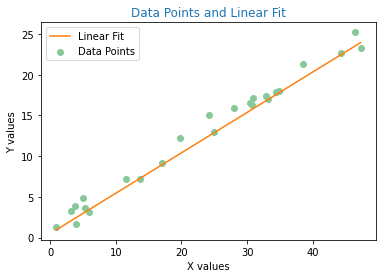

In [160]:
"""
    Args: 
    X: The input values 
    Y: The target output values 
    ([0],[0]): Initial values for w and b.
    J: The cost function given to the algorithm 
    Gradient: The gradient function given to the algorithm 
    MaxiterationNumber: The number of iterations constant 
    learning_Rate: The learning rate constant
"""
# Calculate 
global_w,global_b,costs,parameters = Gradient_Descent_Algorithm(X,Y,[0],[0],J,Gradient,MaxiterationNumber,learning_Rate)
# Plot
plotValues(X,Y,global_w,global_w)




*   Plot the iteration number (x-axis) vs the cost function 𝐽(𝜃) (y-axis value for three values of the learning rate:

1. Small one leading to too many iteration for convergence.
2. Good one leading to reasonable convergence.
3. Large one causing divergence.


All these should appear on the same plot.


---


we will first calculate the algorithm for all the learning rates values then plot them in one figure and finally plot the iteration number vs the cost. 



* Calculate the algorithm for all the learning rates values

In [161]:
# Calculating the algorithm with different values for the learning rate as follows 

"""
    * Underfit --> learning rate is small and equal to 0.0000001
    * Fit --> learning rate is normal and equal to 0.001
    * Overfit --> learning rate is large and equal to 0.1
"""

w_underfit,b_underfit,costs_underfit,parameters_underfit = Gradient_Descent_Algorithm(X,Y,[0],[0],J,Gradient,MaxiterationNumber,0.0000001)
w_fit,b_fit,costs_fit,parameters_fit = Gradient_Descent_Algorithm(X,Y,[0],[0],J,Gradient,MaxiterationNumber,0.001)
w_overfit,b_overfit,costs_overfit,parameters_overfit = Gradient_Descent_Algorithm(X,Y,[0],[0],J,Gradient,MaxiterationNumber,0.1)




y-hat =  [0.53360378]  * x + [0.02162182]   iterations =  142367
y-hat =  [0.49575632]  * x + [1.23989057]   iterations =  27357
overflow encountered in add
y-hat =  [-2.25640352e+152]  * x + [-7.0126358e+150]   iterations =  82


* Plot them in one figure

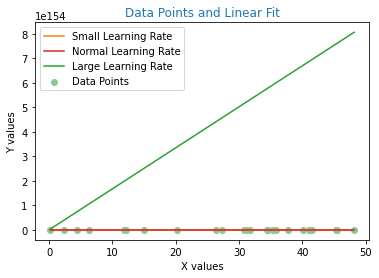

In [152]:
# Plot them in one figure

# Figure properties 
plt.figure()
plt.title('Data Points and Linear Fit', color='C0')
plt.xlabel("X values")
plt.ylabel("Y values")

# Creating the common x-axis line for the figure.
x_line = np.linspace(np.amin(X),np.amax(X))

# Calculating the y-axis value for each learning rate.
y_underfit = np.array(list(map(lambda n: w_underfit*n+b_underfit, x_line)))
plt.plot(x_line, y_underfit,'C1',label='Small Learning Rate')

y_fit = np.array(list(map(lambda n: w_fit*n+b_fit, x_line)))
plt.plot(x_line, y_fit,'C3',label='Normal Learning Rate')

#           Comment this 2 line for better comparing result
y_overfit = np.array(list(map(lambda n: w_overfit*n+b_overfit, x_line)))
plt.plot(x_line, y_overfit,'C2',label='Large Learning Rate')

# Ploting the original dataset in the figure 
plt.scatter(X, Y,color = '#88c999',label='Data Points')


plt.legend()
plt.show()

* Plot the iteration number vs the cost

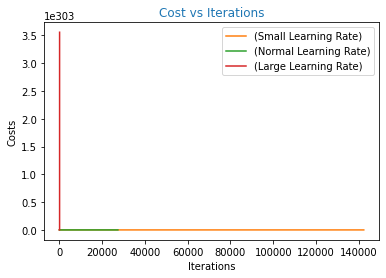

In [162]:
# Plot the iteration number vs the cost

# Figure Properties 
plt.figure()
plt.title('Cost vs Iterations', color='C0')
plt.xlabel("Iterations")
plt.ylabel("Costs")

# Creating x-axis values for the lines
x_underfit = [*range(len(costs_underfit))]
x_fit = [*range(len(costs_fit))]
x_overfit = [*range(len(costs_overfit))]

# Creating y-axis value for the lines 
y_underfit = np.array(costs_underfit[:])
y_fit = np.array(costs_fit)
y_overfit = np.array(costs_overfit)

# Ploting Lines 
plt.plot(x_underfit, y_underfit,'C1',label='(Small Learning Rate)')
plt.plot(x_fit, y_fit,'C2',label='(Normal Learning Rate)')
plt.plot(x_overfit, y_overfit,'C3',label='(Large Learning Rate)')


plt.legend()
plt.show()


* Iterations Number vs The Cost for the small Learning Rate

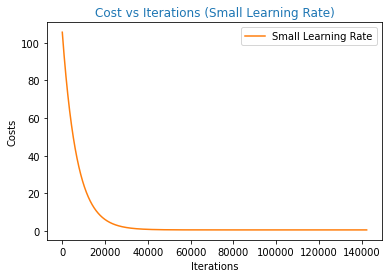

In [163]:
plt.figure()
plt.title('Cost vs Iterations (Small Learning Rate)', color='C0')
plt.plot(x_underfit, y_underfit,'C1',label='Small Learning Rate')
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.legend()
plt.show()

* Iterations Number vs The Cost for the normal Learning Rate

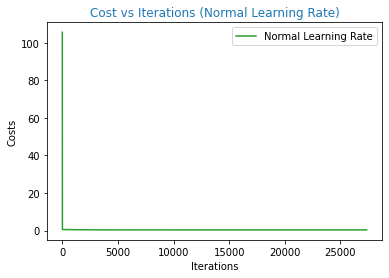

In [164]:
plt.figure()
plt.title('Cost vs Iterations (Normal Learning Rate)', color='C0')
plt.plot(x_fit, y_fit,'C2',label='Normal Learning Rate')
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.legend()
plt.show()

* Iterations Number vs The Cost for the large Learning Rate

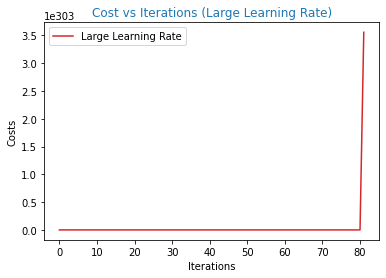

In [165]:
plt.figure()
plt.title('Cost vs Iterations (Large Learning Rate)', color='C0')
plt.plot(x_overfit, y_overfit,'C3',label='Large Learning Rate')
plt.xlabel("Iterations")
plt.ylabel("Costs")
plt.legend()
plt.show()

# The Values of 𝜃0 (aka b) & 𝜃1 (aka w), and R^2


In [166]:
# I only wanted to show the first 100 row thats why I made this variable 

numberOfRows = 100

* Values of w,b, and R^2 for the original algorithm  :



In [167]:
x= np.array(parameters)
y= np.array(costs)
for i in range(len(costs[:min(numberOfRows,len(costs))])):
  print("w value: ",x[i][0][0],"    b value:    ",x[i][1][0],"cost (R^2):",y[i][0])


w value:  0.0     b value:     0.0 cost (R^2): 105.61345257508003
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 7.865435338433512
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 1.083431994649357
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.6127708945240703
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5799991217784372
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5776087564032285
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5773263607032676
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.577190286193525
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5770644310724442
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5769393523782601
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^

* Values of w,b, and R^2 for the algorithm with small learning rate  :



In [168]:
x= np.array(parameters_underfit)
y= np.array(costs_underfit)
for i in range(len(costs_underfit[:min(numberOfRows,len(costs_underfit))])):
  print("w value: ",x[i][0][0],"    b value:    ",x[i][1][0],"cost (R^2):",y[i][0])


w value:  0.0     b value:     0.0 cost (R^2): 105.61345257508003
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.59797938964635
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.58250848362621
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.56703985668378
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.55157350848339
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.5361094386893
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.52064764696587
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.5051881329775
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.4897308963887
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^2): 105.47427593686393
w value:  0.5336037755496394     b value:     0.0216218227858182 cost (R^

* Values of w,b, and R^2 for the algorithm with normal learning rate  :



In [169]:
x= np.array(parameters_fit)
y= np.array(costs_fit)
for i in range(len(costs_fit[:min(numberOfRows,len(costs_fit))])):
  print("w value: ",x[i][0][0],"    b value:    ",x[i][1][0],"cost (R^2):",y[i][0])


w value:  0.0     b value:     0.0 cost (R^2): 105.61345257508003
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 7.865435338433512
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 1.083431994649357
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.6127708945240703
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5799991217784372
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5776087564032285
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5773263607032676
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.577190286193525
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5770644310724442
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^2): 0.5769393523782601
w value:  0.49575632443277406     b value:     1.239890572849042 cost (R^

* Values of w,b, and R^2 for the algorithm with large learning rate  :



In [170]:
x= np.array(parameters_overfit)
y= np.array(costs_overfit)
for i in range(len(costs_overfit[:min(numberOfRows,len(costs_overfit))])):
  print("w value: ",x[i][0][0],"    b value:    ",x[i][1][0],"cost (R^2):",y[i][0])


w value:  0.0     b value:     0.0 cost (R^2): 105.61345257508003
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 554527.2186618906
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 2927583002.6750703
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 15455960842137.234
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 8.159861748773221e+16
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 4.307939470030877e+20
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 2.27434520937074e+24
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 1.2007239580250097e+28
w value:  -2.2564035201432754e+152     b value:     -7.012635798118654e+150 cost (R^2): 6.3391345229167735e+31
w value:  -2.2564035201432754e+152     b value:     -7.01263579

# **Thank You** 